# Classification

In [9]:
import numpy as np
import pandas as pd
import openml

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [100]:
classifiers = {
    'KNeighborsClassifier': (KNeighborsClassifier, {'n_neighbors': [1,2,3,4,5]}),
    'GaussianNB': (GaussianNB, {'var_smoothing': [1e-9, 1e-5, 1e-1]}),
    'LogisticRegression': (LogisticRegression, {'C': [0.1, 0.5, 1.0, 2.0, 5.0]}),
    'DecisionTreeClassifier': (DecisionTreeClassifier, {'max_depth': [1, 3, 5, 8, 10]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier, {'max_depth': [1, 3, 5, 8, 10]}),
    'RandomForestClassifier': (RandomForestClassifier, {'max_depth': [1, 3, 5, 8, 10]}),
    'MLPClassifier': (MLPClassifier, {'alpha': [1e-5, 1e-3, 0.1, 10]})
}

In [94]:
datasets = {
    'steel-plates-fault': openml.datasets.get_dataset(1504, download_data=True, download_qualities=True, download_features_meta_data=True).get_data()[0],
    'ionosphere': openml.datasets.get_dataset(59, download_data=True, download_qualities=True, download_features_meta_data=True).get_data()[0],
    'banknote-authentication': openml.datasets.get_dataset(1462, download_data=True, download_qualities=True, download_features_meta_data=True).get_data()[0]
}

In [101]:
results = {}
best_param = {}

for dataset_name, data in datasets.items():
    X = data.iloc[:, :-1]  # Select all columns except the last as features
    y = data.iloc[:, -1]   # Select the last column as the target
    results[dataset_name] = {}

    for clf_name, (clf_class, param_grid) in classifiers.items():
        # results[dataset_name][clf_name] = []
        param_acc_dict = {}
        
        for param, values in param_grid.items():
            valueList = []
            accList = []
            for value in values:
                accuracies = []

                for i in range(50):
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i, shuffle=True)
                    clf = clf_class()
                    clf.set_params(**{param: value})
                    clf.fit(X_train, y_train)
                    y_pred = clf.predict(X_test)
                    accuracies.append(accuracy_score(y_test, y_pred))
                valueList.append(value)
                accList.append(accuracies)
               
        mean_accuracies = [np.mean(accuracies) for value, accuracies in zip(valueList, accList)]
        mean_errors = [1 - accuracy for accuracy in mean_accuracies]
        best_index = np.argmax(mean_accuracies)
        best_mean_error = mean_errors[best_index]
        best_param = values[best_index]

        # print("Dataset: ", dataset_name)
        # print("Clf: ", clf_name)
        # print("Mean accuracy: ", mean_accuracies)
        # print("Best index: ", best_param)
        # print("Best mean error: ", best_mean_error)
        
        results[dataset_name][clf_name] = [(param, valueList, accList)]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [102]:

# Extract data for DataFrames
index = classifiers.keys()
columns = datasets.keys()

# Find mean errors
data_mean_error = []
for clf_name in classifiers.keys():
    row = []
    for dataset_name in datasets.keys():
        param, valueList, accList = results[dataset_name][clf_name][0]
        mean_accuracies = [np.mean(accuracies) for accuracies in accList]
        mean_errors = [1 - accuracy for accuracy in mean_accuracies]
        best_index = np.argmax(mean_accuracies)
        best_mean_error = mean_errors[best_index]
        row.append(best_mean_error)
    data_mean_error.append(row)

df_mean_error = pd.DataFrame(data_mean_error, index=index, columns=columns)

# Find the best param
data_best_param = []
for clf_name in classifiers.keys():
    row = []
    for dataset_name in datasets.keys():
        param, valueList, accList = results[dataset_name][clf_name][0]
        mean_accuracies = [np.mean(accuracies) for accuracies in accList]
        best_index = np.argmax(mean_accuracies)
        best_param = valueList[best_index]
        row.append(best_param)
    data_best_param.append(row)

df_best_param = pd.DataFrame(data_best_param, index=index, columns=columns)

print("Table 1: Best Mean Errors")
print(df_mean_error)
print("\nTable 2: Best Parameters")
print(df_best_param)

Table 1: Best Mean Errors
                            steel-plates-fault  ionosphere  \
KNeighborsClassifier                  0.359918    0.118636   
GaussianNB                            0.355201    0.111591   
LogisticRegression                    0.307662    0.133523   
DecisionTreeClassifier                0.000000    0.123068   
GradientBoostingClassifier            0.000000    0.081705   
RandomForestClassifier                0.016272    0.071705   
MLPClassifier                         0.397343    0.096364   

                            banknote-authentication  
KNeighborsClassifier                       0.000204  
GaussianNB                                 0.159971  
LogisticRegression                         0.010991  
DecisionTreeClassifier                     0.023003  
GradientBoostingClassifier                 0.011050  
RandomForestClassifier                     0.009913  
MLPClassifier                              0.000000  

Table 2: Best Parameters
                   

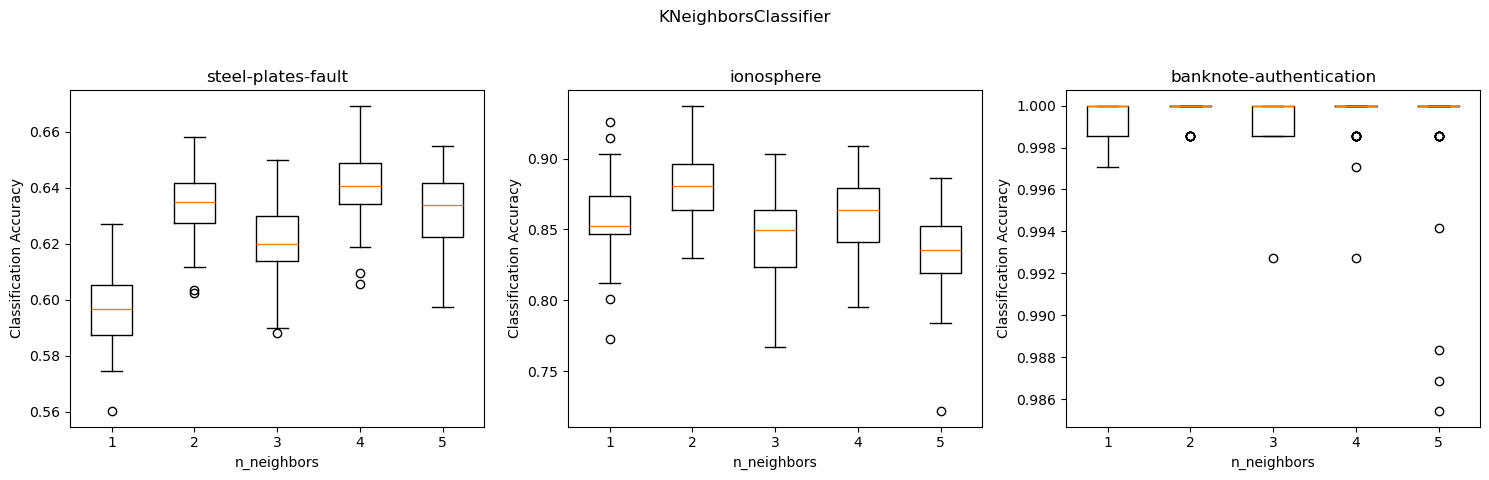

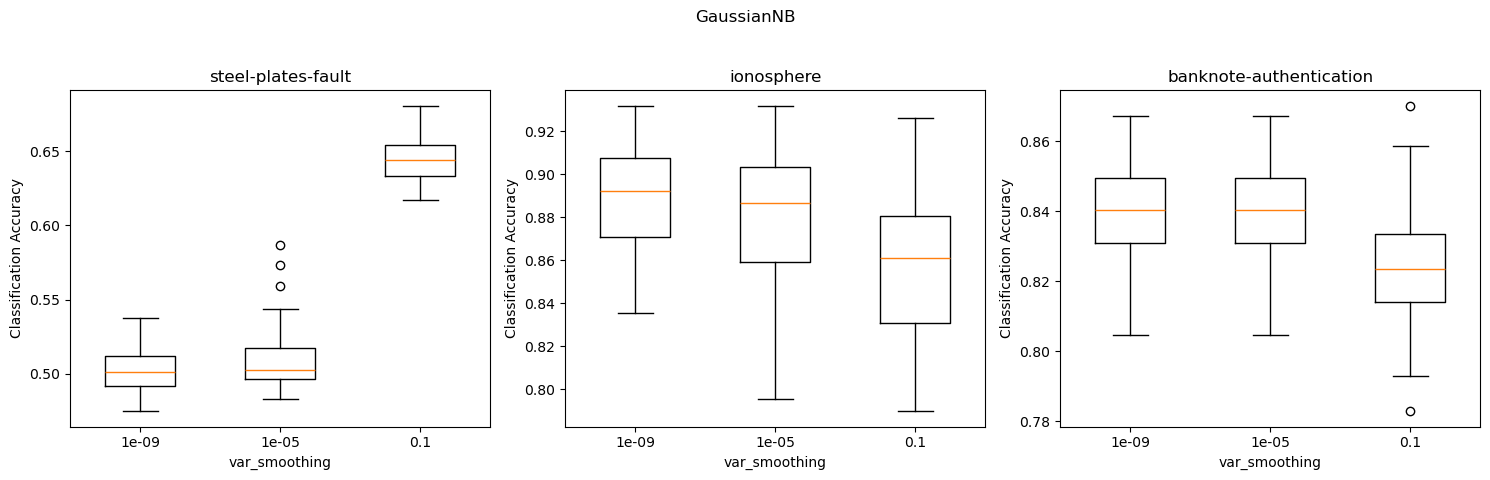

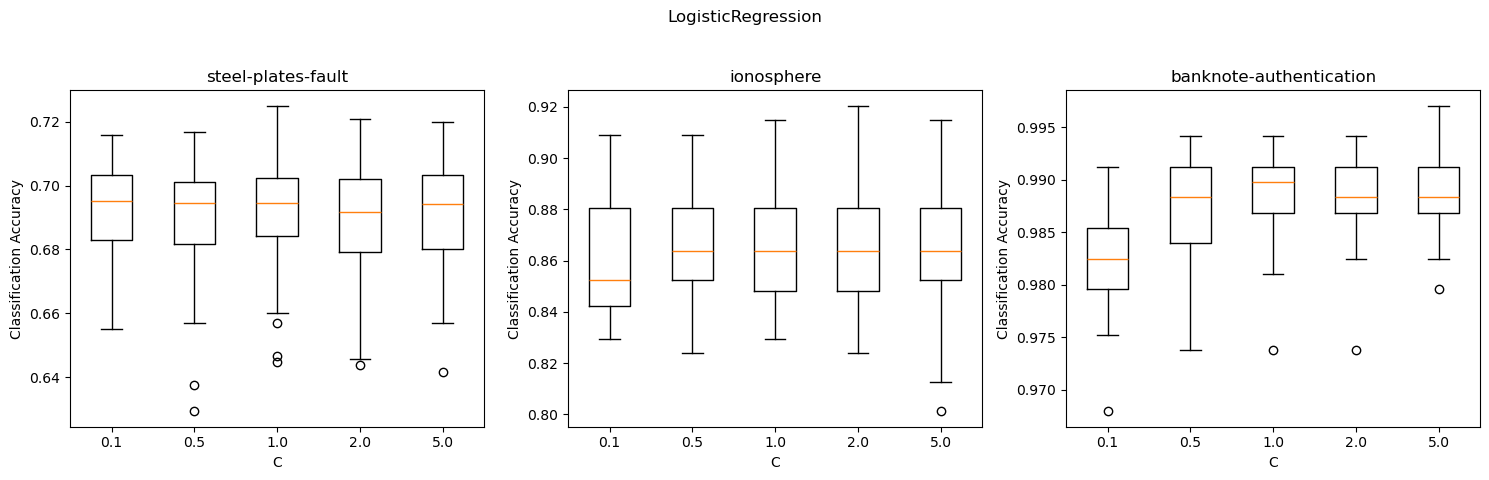

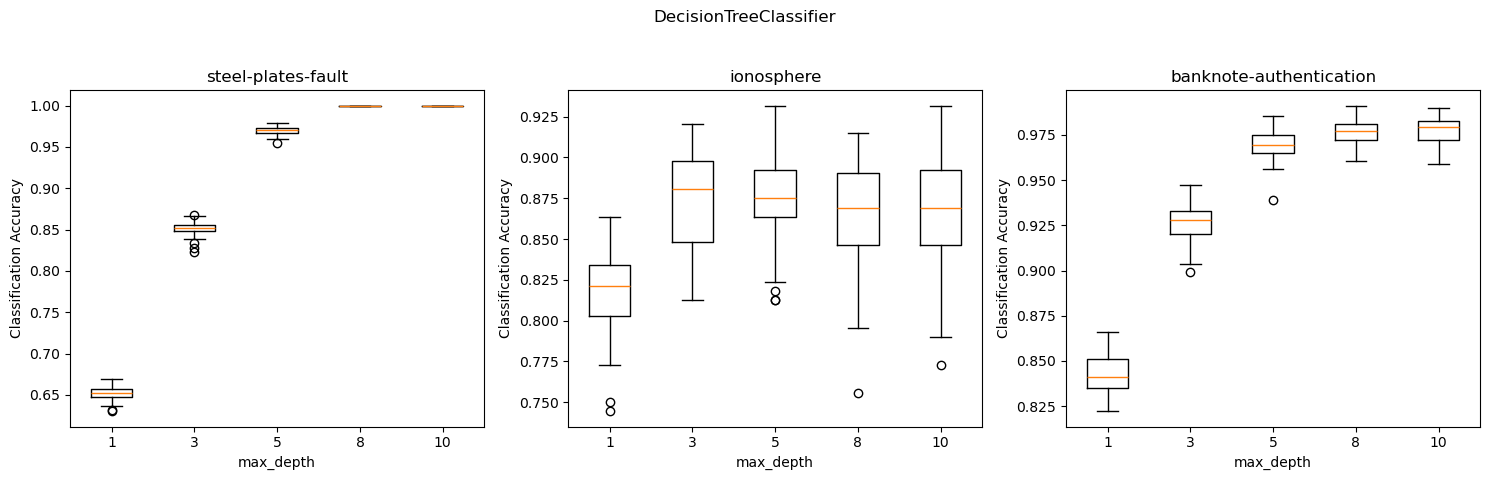

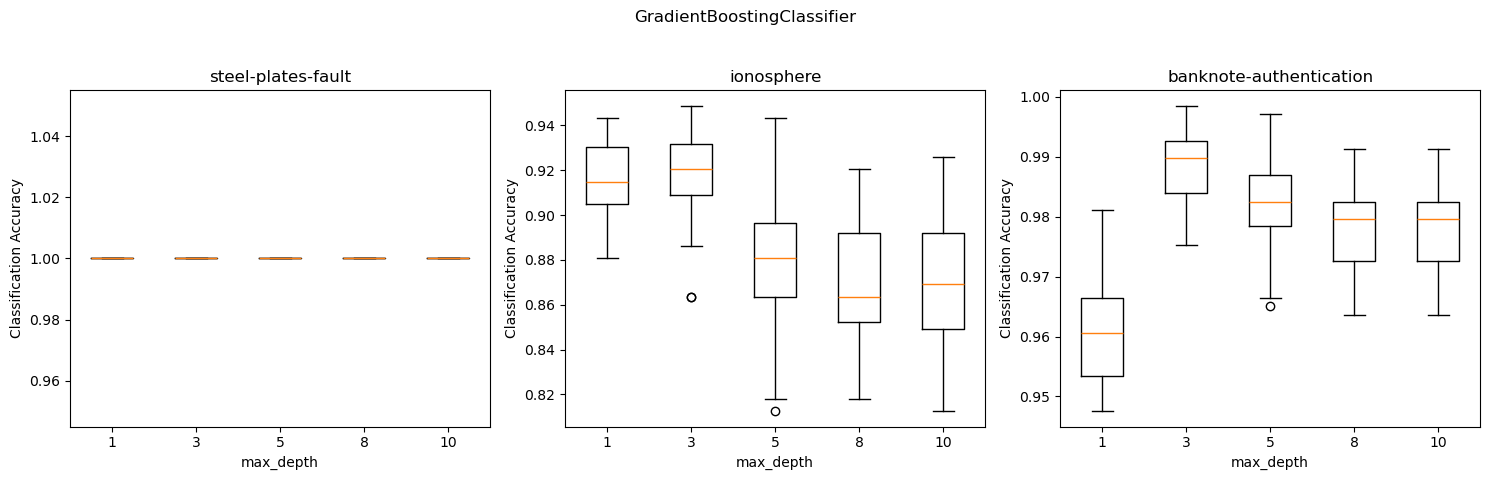

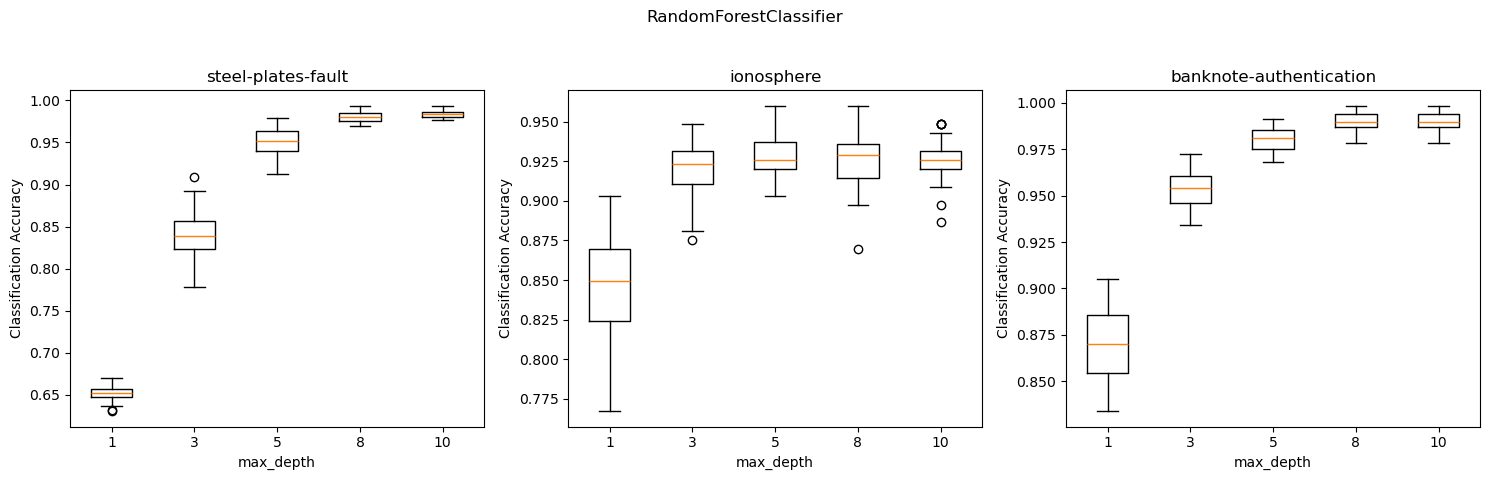

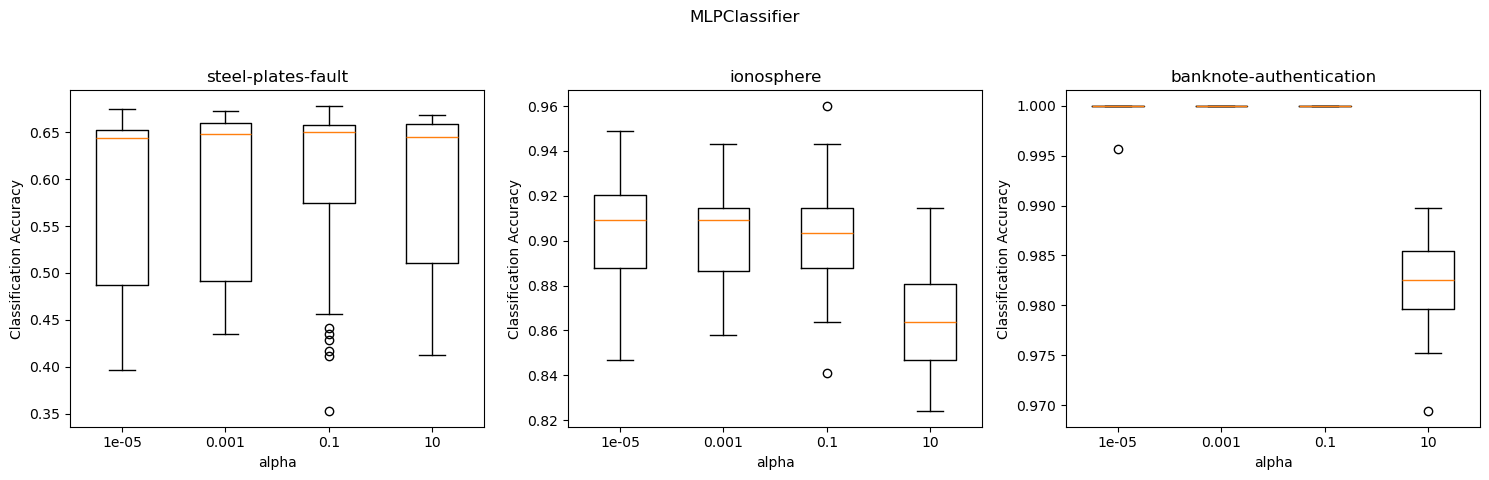

In [103]:

for clf_name in classifiers:
    fig, axes = plt.subplots(1, len(datasets), figsize=(15, 5))
    fig.suptitle(clf_name)

    for i, (dataset_name, result) in enumerate(results.items()):
        param = result[clf_name][0][0]
        valueList = result[clf_name][0][1]
        accuraciesList = result[clf_name][0][2]

        # Prepare data for boxplot
        boxplot_data = [acc for acc in accuraciesList] 
        positions = list(range(1, len(valueList) + 1))

        # Create the boxplot
        axes[i].boxplot(boxplot_data, positions=positions, widths=0.5)
        axes[i].set_title(f'{dataset_name}')
        axes[i].set_xlabel(f'{param}')
        axes[i].set_ylabel('Classification Accuracy')
        axes[i].set_xticks(positions)
        axes[i].set_xticklabels(valueList)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Clustering

In [58]:
from sklearn.datasets import make_blobs, make_classification, make_circles
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, AgglomerativeClustering, Birch, MeanShift
from sklearn.mixture import GaussianMixture


In [104]:
SEED = 42

cluster_datasets = {
    "Blobs": make_blobs(n_samples=1000, n_features=2, random_state=SEED),
    "Classification": make_classification(n_samples=1000, n_informative=2, n_clusters_per_class=1, random_state=SEED),
    "Circles": make_circles(n_samples=1000, noise=0.3, random_state=SEED)
}

In [106]:

clustering_algorithms = {
    "K-Means",
    "Affinity Propagation",
    "DBSCAN",
    "Gaussian Mixture Model",
    "BIRCH",
    "Agglomerative Clustering",
    "Mean Shift"
}

In [105]:

def get_algo(algo_name, cluster):
    algo_dict = {
        "K-Means": KMeans(n_clusters=cluster, random_state=SEED),
        "Affinity Propagation": AffinityPropagation(random_state=SEED),
        "DBSCAN": DBSCAN(),
        "Gaussian Mixture Model": GaussianMixture(),
        "BIRCH": Birch(n_clusters=cluster),
        "Agglomerative Clustering": AgglomerativeClustering(n_clusters=cluster),
        "Mean Shift": MeanShift()
    }
    
    return algo_dict.get(algo_name, None)

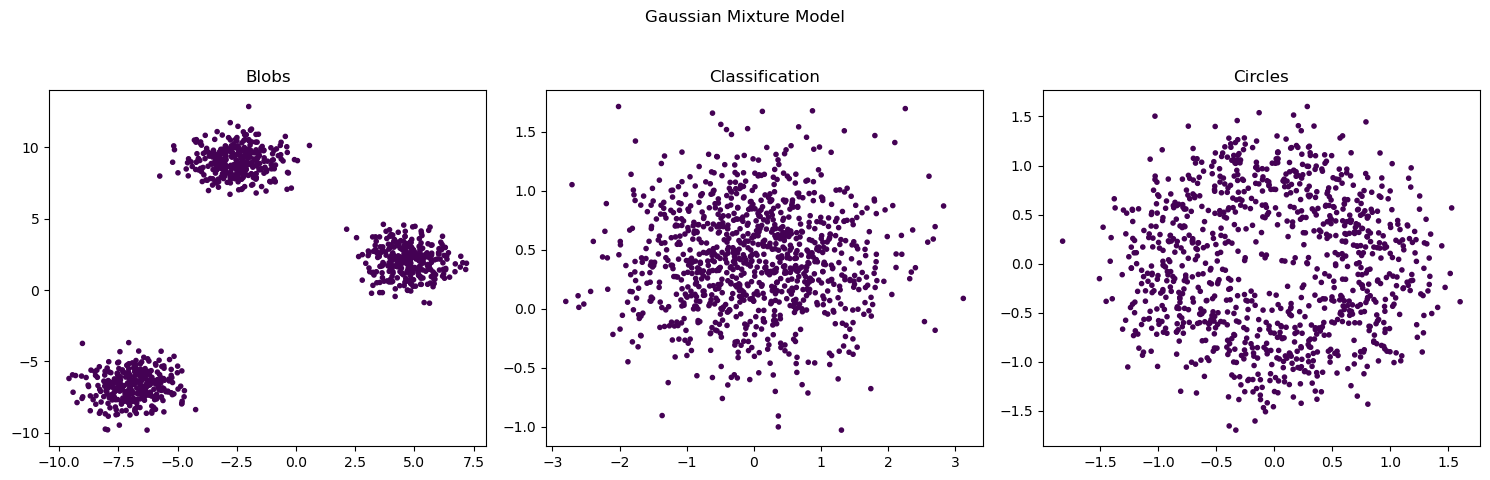

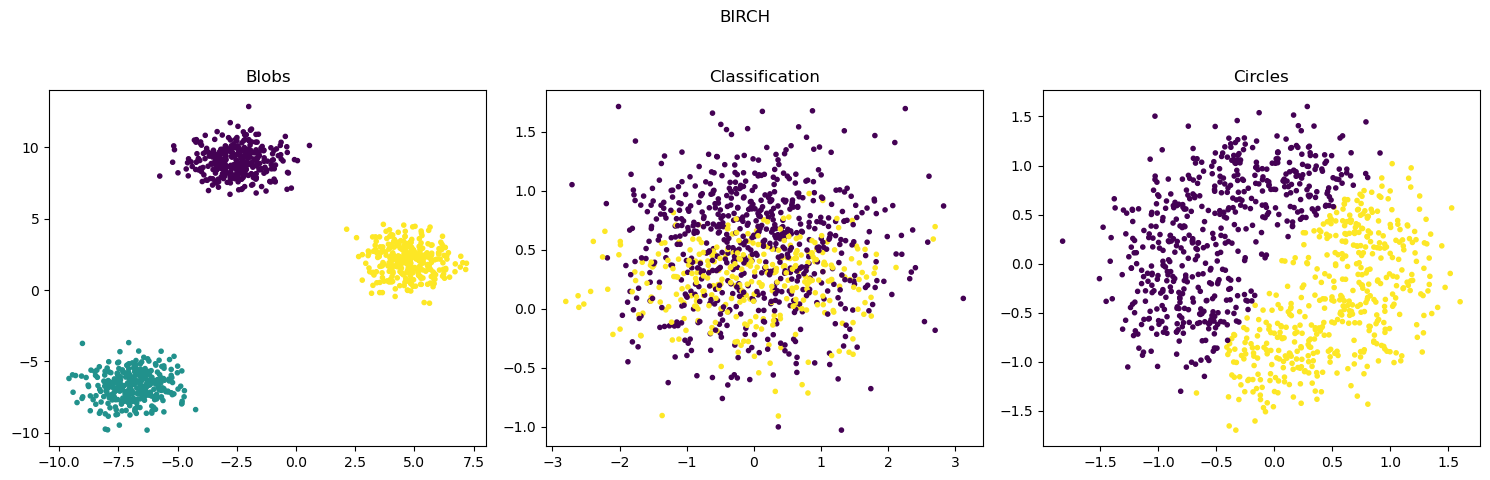

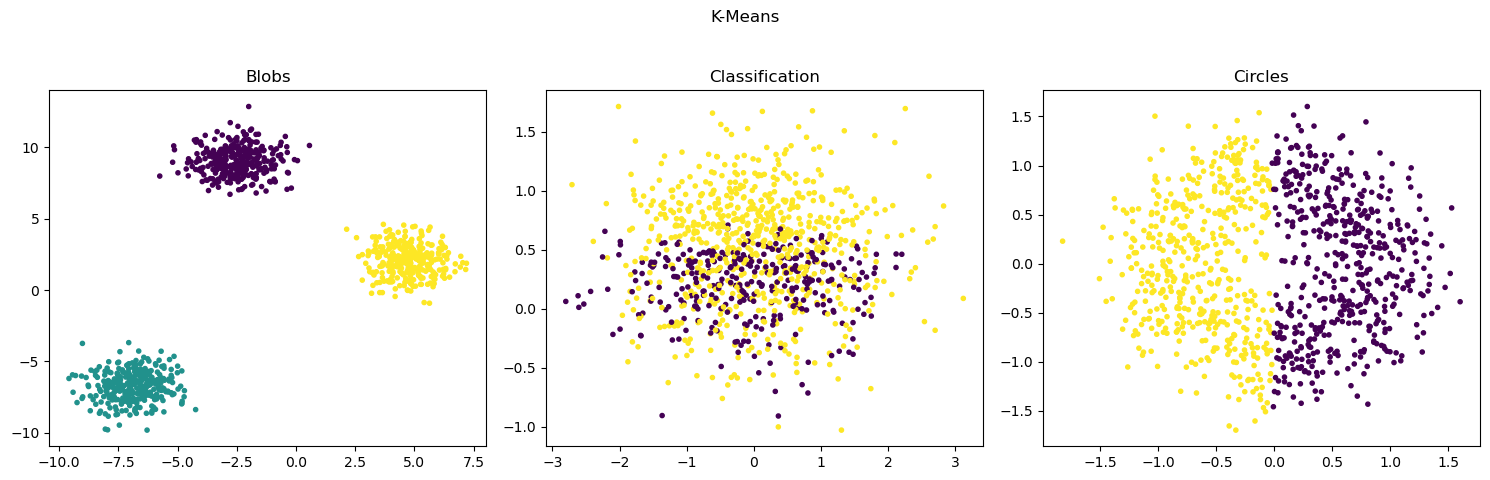

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


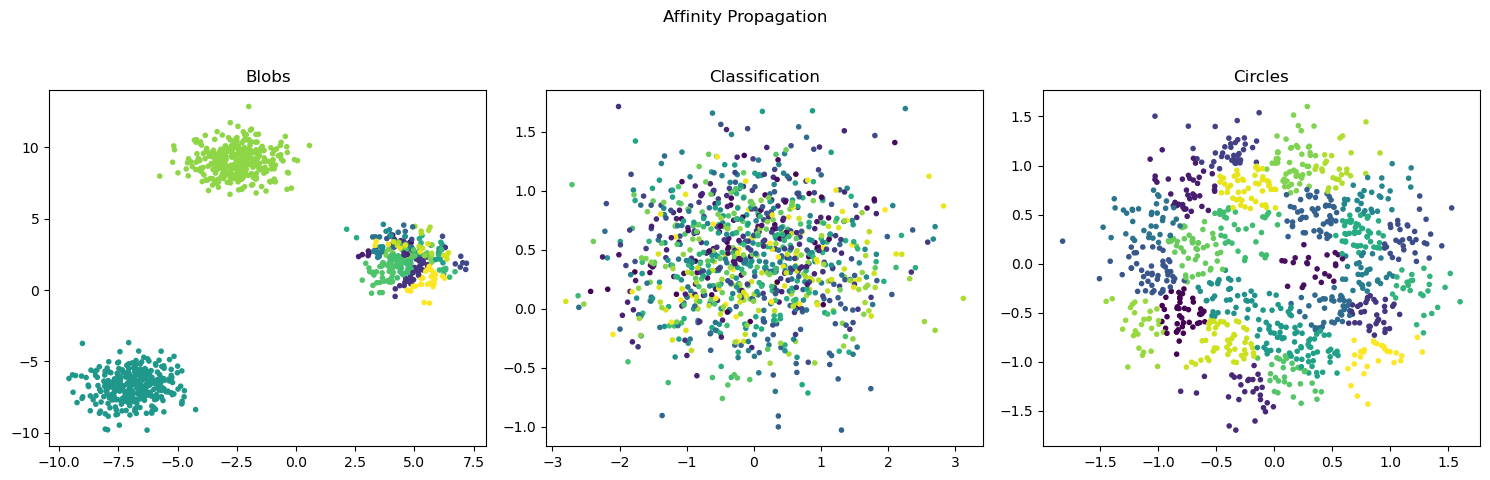

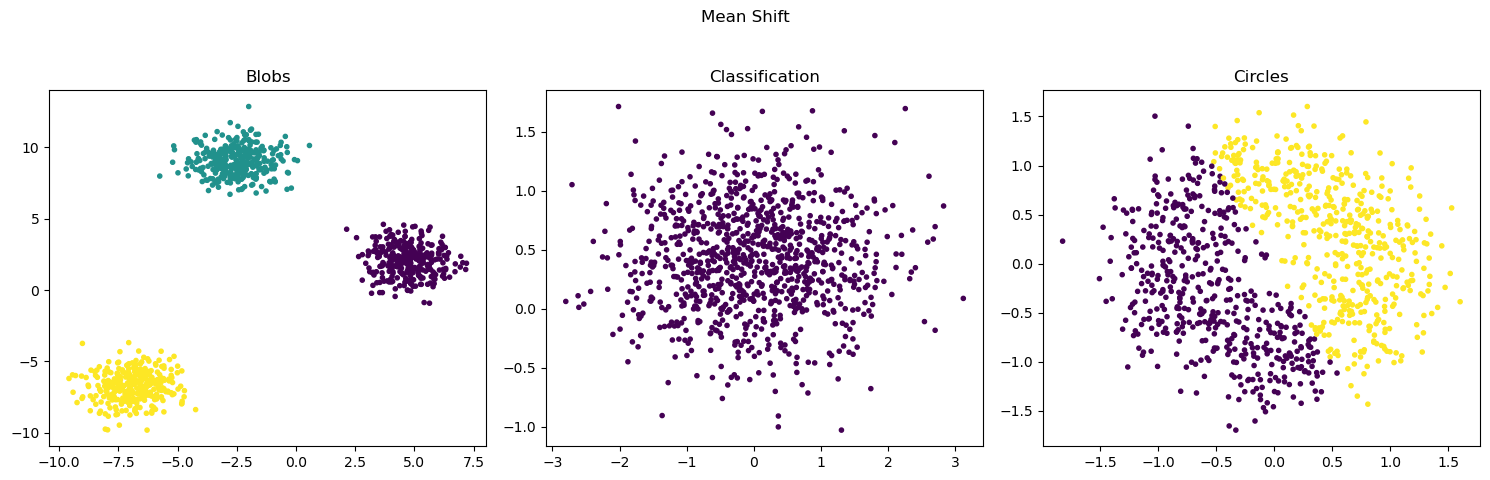

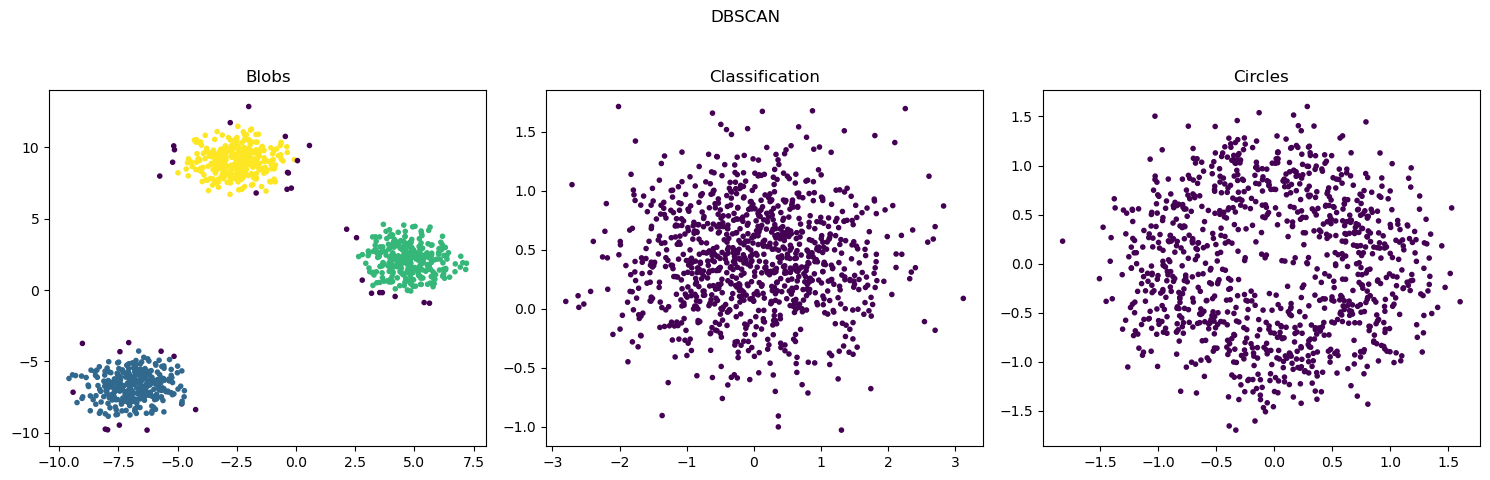

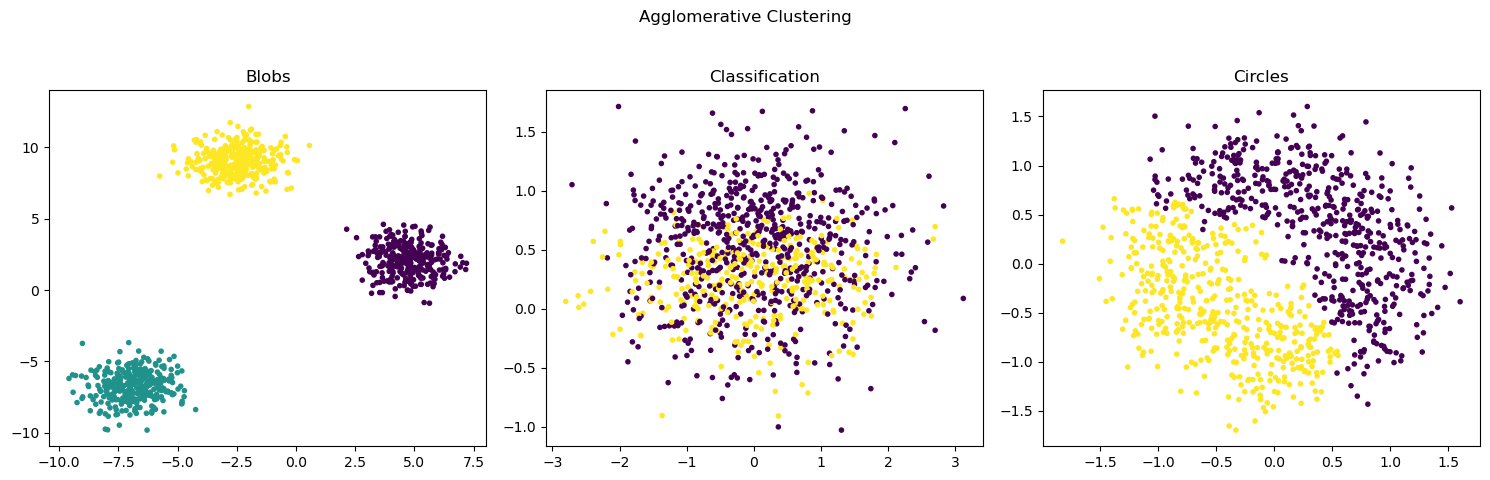

In [107]:

for algo_name in clustering_algorithms:

    fig, axes = plt.subplots(1, len(cluster_datasets), figsize=(15, 5))
    fig.suptitle(algo_name)

    for i, (dataset_name, (X, y)) in enumerate(cluster_datasets.items()):

        n_clusters = len(np.unique(y))
        algorithm = get_algo(algo_name, n_clusters)
        algorithm.fit(X)

        if algo_name == "Gaussian Mixture Model":
            clusters = algorithm.predict(X)
        else:
            clusters = algorithm.labels_

        ax = axes[i]
        ax.set_title(f'{dataset_name}')
        ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='.')
        #sns.scatterplot(x=datasets[dataset_name][0][:, 0], y=datasets[dataset_name][0][:, 1], hue=clusters, palette='viridis', ax=ax, legend=None, s=50)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()